Import packages for reading the geojson, converting to pandas dataframe, and modelling in Prophet and SARIMAX

In [1]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

geopandas reading the file

In [2]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

In [3]:
df = gp.read_file(filename)
df.head()

,parameter,geometry
0,"{'ALLSKY_KT': {'198401': 0.43, '198402': 0.39,...",POINT Z (-123.57160 48.40930 211.36000)


In [10]:
df['geometry'][0].values

AttributeError: 'Point' object has no attribute 'values'

In [8]:
loc = []
loc.append(df['geometry'][0])
print(loc)

Due to formatting, the data is all located in the first column/row of the json:

In [5]:
df['parameter'][0]

{'ALLSKY_KT': {'198401': 0.43,
  '198402': 0.39,
  '198403': 0.47,
  '198404': 0.48,
  '198405': 0.48,
  '198406': 0.48,
  '198407': 0.6,
  '198408': 0.55,
  '198409': 0.48,
  '198410': 0.41,
  '198411': 0.33,
  '198412': 0.41,
  '198413': 0.48,
  '198501': 0.47,
  '198502': 0.45,
  '198503': 0.54,
  '198504': 0.48,
  '198505': 0.52,
  '198506': 0.54,
  '198507': 0.63,
  '198508': 0.59,
  '198509': 0.51,
  '198510': 0.4,
  '198511': 0.43,
  '198512': 0.46,
  '198513': 0.52,
  '198601': 0.37,
  '198602': 0.45,
  '198603': 0.45,
  '198604': 0.43,
  '198605': 0.48,
  '198606': 0.51,
  '198607': 0.5,
  '198608': 0.61,
  '198609': 0.49,
  '198610': 0.45,
  '198611': 0.4,
  '198612': 0.4,
  '198613': 0.48,
  '198701': 0.39,
  '198702': 0.46,
  '198703': 0.51,
  '198704': 0.52,
  '198705': 0.58,
  '198706': 0.59,
  '198707': 0.51,
  '198708': 0.59,
  '198709': 0.55,
  '198710': 0.55,
  '198711': 0.38,
  '198712': 0.41,
  '198713': 0.53,
  '198801': 0.41,
  '198802': 0.46,
  '198803': 0.45,
  

Convert the data (type: dict) into a pandas dataframe

In [7]:
Idict = df['parameter'][0]

In [8]:
Idf =  pd.DataFrame.from_dict(Idict)
Idf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.43,71.46,0.66,2.80,-999.00,-999.00,0.23,-999.00,1.20,1.85,-999.00,-999.00,-999.00,-999
198402,0.39,82.41,0.69,4.35,-999.00,-999.00,0.23,-999.00,1.71,2.99,-999.00,-999.00,-999.00,-999
198403,0.47,76.16,0.72,6.63,-999.00,-999.00,0.21,-999.00,3.13,4.76,-999.00,-999.00,-999.00,-999
198404,0.48,77.63,0.74,8.97,-999.00,-999.00,0.16,-999.00,4.30,6.69,-999.00,-999.00,-999.00,-999
198405,0.48,75.46,0.73,10.75,-999.00,-999.00,0.25,-999.00,5.23,7.82,-999.00,-999.00,-999.00,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202009,0.52,47.92,0.63,7.34,8.49,0.16,0.09,4.80,3.77,4.63,69.04,1.34,84.33,-999
202010,0.45,68.50,0.68,5.01,5.15,0.09,0.10,3.01,2.21,3.41,40.66,1.05,62.92,-999
202011,0.37,79.25,0.66,3.17,2.64,0.02,0.09,1.91,1.17,2.10,20.93,0.62,37.69,-999
202012,0.35,79.65,0.63,2.37,1.81,0.01,0.09,1.65,0.84,1.51,14.81,0.44,26.85,-999


The data we want in this situation is located in the first column ``AllSKY_KT``

**Note**: many of the other columns have incomplete data (-999.0) so if we do want to use them as extra variables, we need to be careful in our choices

In [9]:
Prophetdf = pd.DataFrame(Idf['ALLSKY_KT'])
type(Prophetdf)
Prophetdf

,ALLSKY_KT
198401,0.43
198402,0.39
198403,0.47
198404,0.48
198405,0.48
...,...
202009,0.52
202010,0.45
202011,0.37
202012,0.35


In [10]:
Prophetdf['ALLSKY_KT'][0]

0.43

Plotting the data with matplotlib

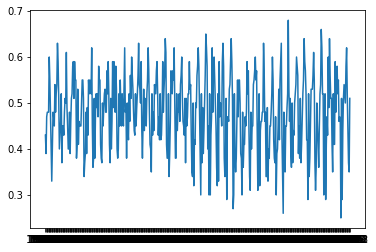

In [11]:
plt.plot(Prophetdf['ALLSKY_KT'][:])

The datasets are monthly/annual, so the 13th month/every 13th row is the annual average. This needs to be removed from the df 
.

In [12]:
Prophetdf.index[12::13]

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')

Renaming the first column to 'y', then fixing the date system.

Prophet requires the date to be year/month, so this cell splits the datemonth index into date/month

In [13]:
Prophetdf=Prophetdf.rename(columns={"ALLSKY_KT": "y"})


def append(dfseries):
    dfseries = dfseries[:4] + '/' + dfseries[4:]
    return dfseries
print(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf = Prophetdf.drop(Prophetdf.index[12::13])
print(Prophetdf.shape)
Prophetdf['ds']=Prophetdf.index
Prophetdf['ds']= Prophetdf['ds'].astype(str)

Prophetdf['ds'] = Prophetdf['ds'].apply(append)
#a_string = a_string[:1] + "b" + a_string[1:]
Prophetdf

Index(['198413', '198513', '198613', '198713', '198813', '198913', '199013',
       '199113', '199213', '199313', '199413', '199513', '199613', '199713',
       '199813', '199913', '200013', '200113', '200213', '200313', '200413',
       '200513', '200613', '200713', '200813', '200913', '201013', '201113',
       '201213', '201313', '201413', '201513', '201613', '201713', '201813',
       '201913', '202013'],
      dtype='object')
(481, 1)
(444, 1)


,y,ds
198401,0.43,1984/01
198402,0.39,1984/02
198403,0.47,1984/03
198404,0.48,1984/04
198405,0.48,1984/05
...,...,...
202008,0.62,2020/08
202009,0.52,2020/09
202010,0.45,2020/10
202011,0.37,2020/11


In [14]:
Prophetdf['ds'][26]

'1986/03'

Fitting with prophet model:

In [42]:
m = Prophet()
m.fit(Prophetdf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.14409


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       970.823    0.00022251       55.9894      0.5946      0.5946      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       970.914   0.000231758       73.1296    3.07e-06       0.001      228  LS failed, Hessian reset 
     168       970.939   5.32695e-06       81.3434   7.159e-08       0.001      292  LS failed, Hessian reset 
     199       970.939   1.20963e-08       80.6911    0.009009           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       970.939   8.03356e-08       63.0048      0.1514      0.9982      344   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Forecasting with Prophet. 

To account for seasonality with monthly data, set ``frequ='MS'`` (stands for month-start, so the data point is set at the beginning of the month). Periods is the number of months to predict. 

I tried modelling with both monthly and quarterly (we can check accuracy of these two. I think quarterly might make sense?)

In [60]:
future_quarterly = m.make_future_dataframe(periods=75, freq='QS')
future_quarterly.tail()

forecast_QS = m.predict(future_quarterly)
forecast_QS[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
514,2038-07-01,0.581586,0.522336,0.642373
515,2038-10-01,0.459534,0.400030,0.519923
516,2039-01-01,0.389027,0.331147,0.448244
517,2039-04-01,0.505818,0.449783,0.565223
518,2039-07-01,0.573813,0.511807,0.633173


In [61]:
future_MS = m.make_future_dataframe(periods=300, freq='MS')
future_MS.tail()

forecast_MS = m.predict(future_MS)
forecast_MS[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
739,2045-08-01,0.592716,0.530111,0.654217
740,2045-09-01,0.558707,0.498581,0.620022
741,2045-10-01,0.457608,0.401227,0.523406
742,2045-11-01,0.396635,0.335461,0.462569
743,2045-12-01,0.383331,0.323919,0.447345


Plot of the forecast.

Clearly the index does not seem to change much, but this may be due to the Prophet model itself?

### Note on axes:

even though the model is for monthly seasonality, the model measures time in days from Jan 1, 1970 (Unix UTC). It's wild.

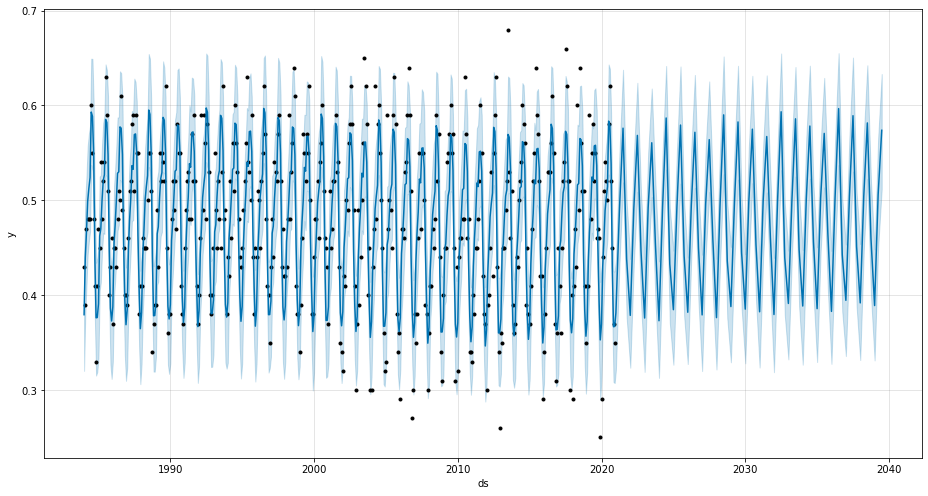

In [66]:
fig1 = m.plot(forecast_QS, figsize=(13,7))

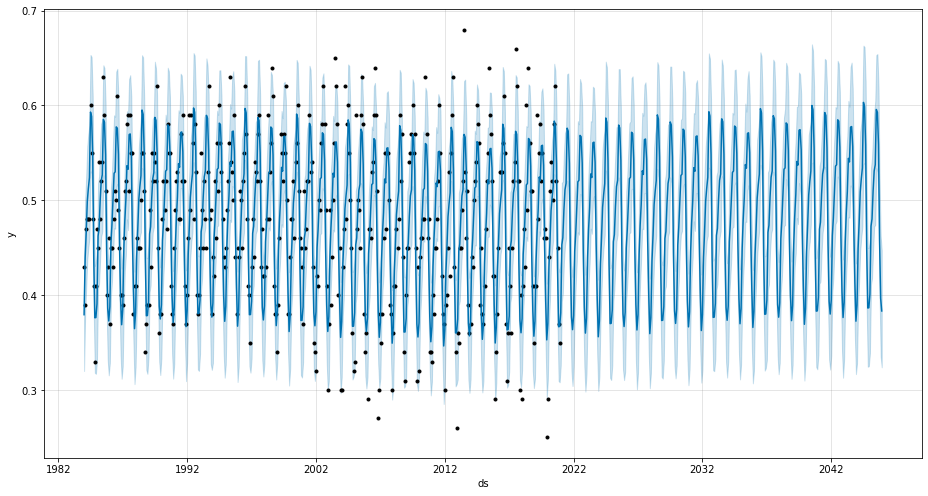

In [65]:
fig2 = m.plot(forecast_MS, figsize=(13,7))

Predicting annualy (Year Start):


In [67]:
future_YS = m.make_future_dataframe(periods=20, freq='YS')
future_YS.tail()

forecast_YS= m.predict(future_quarterly)
forecast_YS[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
514,2038-07-01,0.581586,0.524069,0.645011
515,2038-10-01,0.459534,0.401849,0.521446
516,2039-01-01,0.389027,0.332071,0.448357
517,2039-04-01,0.505818,0.450353,0.568211
518,2039-07-01,0.573813,0.515948,0.632972


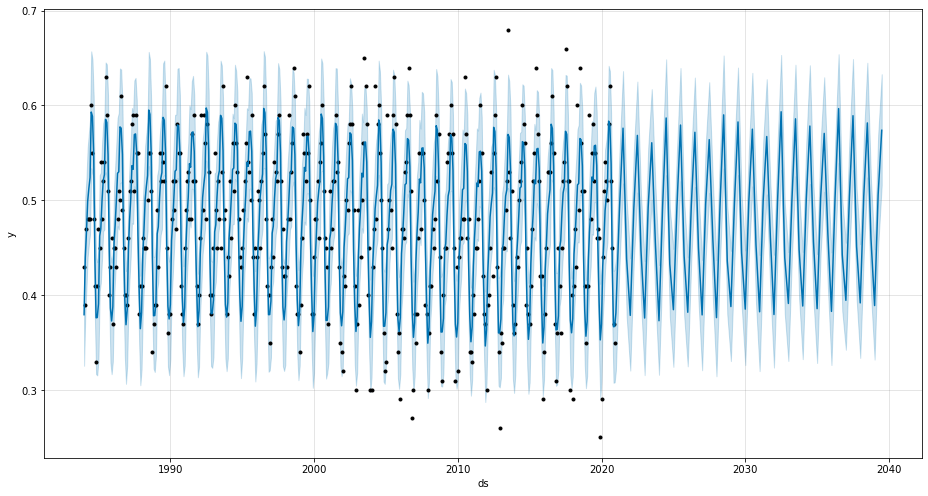

In [69]:
figY = m.plot(forecast_YS, figsize=(13,7))

## ARIMA (technically SARIMAX)

The same dataset modified and used for Prophet can also be used for this model. The variables in ``order`` and ``seasonal_order`` are the hyperparameters for this model. See [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) for documentation on SARIMAX, and [here](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html) for ARIMA

In [29]:
#model = ARIMA(Prophetdf['y'],exog =Prophetdf['ds'], order=(5,1,0))
model = ARIMA(Prophetdf['y'].values, order=(4,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [30]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  444
Model:             ARIMA(4, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 659.167
Date:                            Fri, 04 Mar 2022   AIC                          -1304.333
Time:                                    14:03:17   BIC                          -1275.870
Sample:                                         0   HQIC                         -1293.095
                                            - 444                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7288      0.049    -14.724      0.000      -0.826      -0.632
ar.L2         -0.5446      0.059   

Predicting solar forecast:

### Note:

In prediction paramters, time starts at 1, not 0. Otherwise we get a really weird tail.

In [34]:
pred_sol = model_fit.predict(start = 1, end = 600)

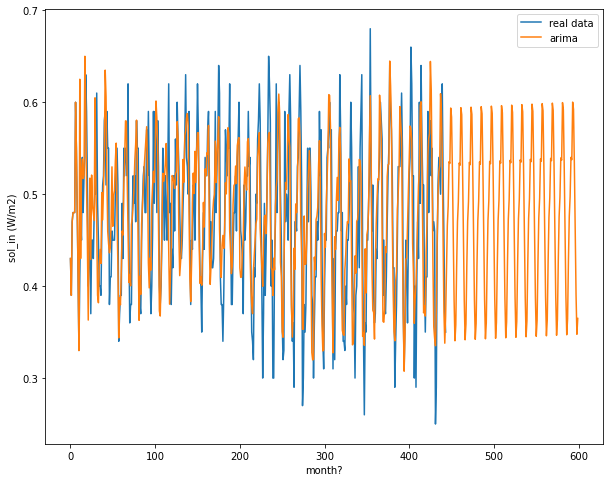

In [48]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(Prophetdf['y'].values,label = 'real data')
ax.plot(pred_sol, label = 'arima')
ax.set_xlabel('month?')
ax.set_ylabel('sol_in (W/m2)')
ax.legend()